In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del dataset en Google Drive
dataset = '/content/drive/My Drive/M5-UDD/Clase 3/imagenes'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Listar las carpetas de las clases
classes = os.listdir(dataset)
print(f"Clases detectadas: {classes}")

Clases detectadas: ['autos', 'camiones', 'aviones']


In [ ]:
# Contar la cantidad de imágenes en cada clase
for class_name in classes:
    class_path = os.path.join(dataset, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name}: {len(os.listdir(class_path))} imágenes")


autos: 20 imágenes
camiones: 20 imágenes
aviones: 20 imágenes


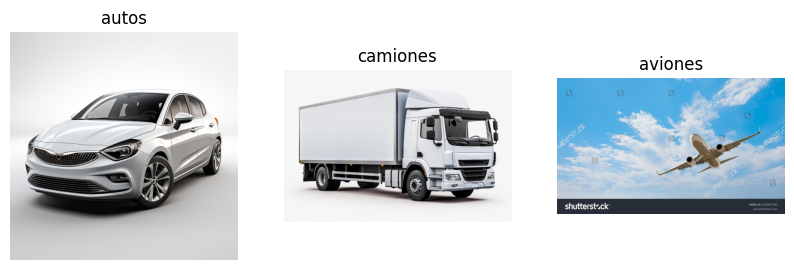

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Mostrar una imagen de cada clase
plt.figure(figsize=(10, 5))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset, class_name)
    first_image_path = os.path.join(class_path, os.listdir(class_path)[0])
    img = Image.open(first_image_path)

    plt.subplot(1, len(classes), i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()


In [ ]:
from PIL import Image, UnidentifiedImageError
import os

# Extensiones soportadas
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}

# Inspeccionar cada imagen y extraer sus características
for class_name in os.listdir(dataset):
    class_path = os.path.join(dataset, class_name)
    if os.path.isdir(class_path):
        print(f"\nClase: {class_name}")
        images = os.listdir(class_path)

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            # Verificar extensión del archivo
            if not os.path.splitext(img_path)[1].lower() in valid_extensions:
                print(f"Archivo no soportado (omitido): {img_name}")
                continue

            try:
                # Abrir y analizar la imagen
                with Image.open(img_path) as img:
                    dimensions = img.size  # (ancho, alto)
                    mode = img.mode  # Modo de color (e.g., RGB, L, etc.)
                    bits = img.bits if hasattr(img, 'bits') else 'Desconocido'  # Bits por canal
                    fmt = img.format  # Formato de la imagen
                    print(f"Imagen: {img_name} - Dimensiones: {dimensions}, Canales: {mode}, Bits: {bits}, Formato: {fmt}")
            except UnidentifiedImageError:
                print(f"Error: No se pudo identificar la imagen: {img_name}")



Clase: autos
Imagen: auto001.jpg - Dimensiones: (826, 826), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto002.jpg - Dimensiones: (1380, 789), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto003.jpg - Dimensiones: (1060, 795), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto004.jpg - Dimensiones: (1800, 900), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto005.jpg - Dimensiones: (1380, 920), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto006.jpg - Dimensiones: (1380, 920), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto007.jpg - Dimensiones: (996, 796), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto008.jpg - Dimensiones: (1380, 776), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto009.jpg - Dimensiones: (1380, 776), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto010.jpg - Dimensiones: (1380, 776), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto011.jpg - Dimensiones: (1380, 776), Canales: RGB, Bits: 8, Formato: JPEG
Imagen: auto012.jpg - Dimensiones: (1380, 776), Canal

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from PIL import Image

# Parámetros
img_height, img_width = 128, 128  # Ajustar el tamaño de las imágenes
num_classes = 3  # Número de clases (ajustar según tu caso)

# Cargar las imágenes
x_data = []
y_data = []

classes = os.listdir(dataset)  # Asegúrate de que 'dataset' está definido
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(dataset, class_name)
    images = os.listdir(class_path)
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((img_width, img_height))
            x_data.append(np.array(img))
            y_data.append(class_index)
        except Exception as e:
            print(f"Error al procesar la imagen {img_name}: {e}")

# Convertir a NumPy arrays
x_data = np.array(x_data, dtype="float32") / 255.0  # Normalizar
y_data = np.array(y_data, dtype="int")
y_data = to_categorical(y_data, num_classes=num_classes)  # Codificar etiquetas

# Dividir los datos en entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=(img_height, img_width, 3), activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=RMSprop(learning_rate=0.001, decay=1e-6),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
batch_size = 8
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))


# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Loss en test: {test_loss}, Accuracy en test: {test_accuracy}")


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.4354 - loss: 15.4468 - val_accuracy: 0.4167 - val_loss: 1.0991
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3149 - loss: 1.1199 - val_accuracy: 0.3333 - val_loss: 1.0953
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3277 - loss: 1.0906 - val_accuracy: 0.3333 - val_loss: 1.0660
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4128 - loss: 1.2122 - val_accuracy: 0.1667 - val_loss: 1.0972
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5783 - loss: 1.0648 - val_accuracy: 0.1667 - val_loss: 1.2092
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4375 - loss: 1.0216 - val_accuracy: 0.5000 - val_loss: 1.0730
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3342 - loss: 1.8089 - val_accuracy: 0.4167 - val_loss: 0.9996
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5997 - loss: 1.3393 - val_accuracy: 0.4167 - val_loss: 1.058

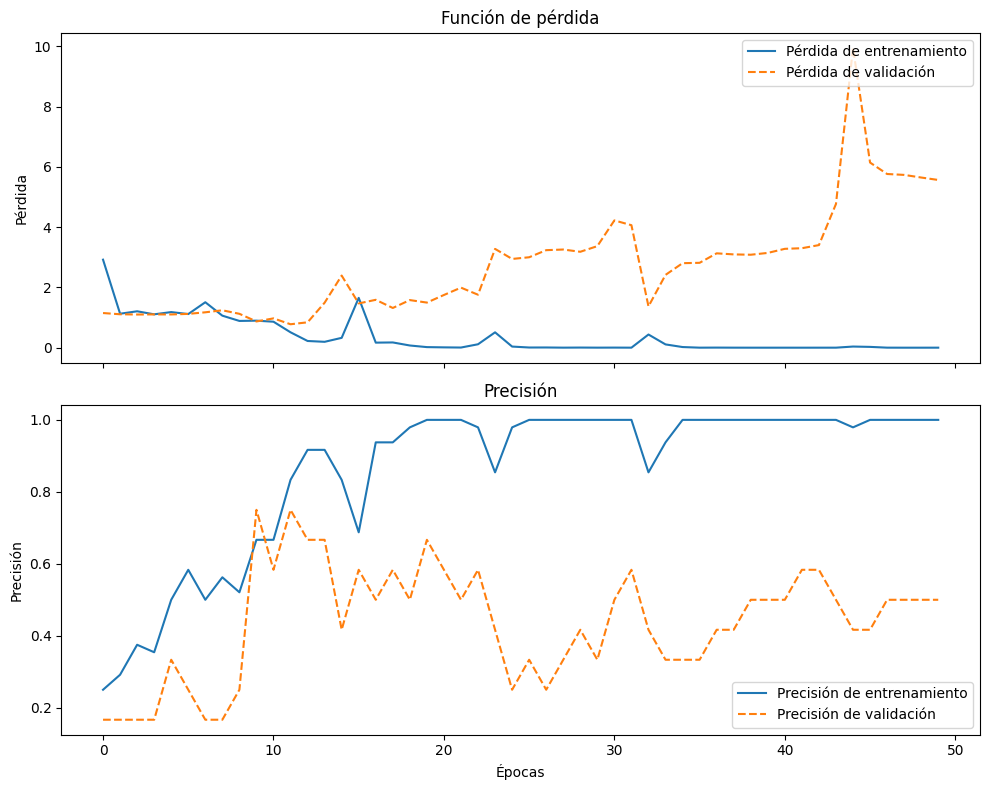

In [ ]:
import matplotlib.pyplot as plt

# Crear figura
fig = plt.figure(figsize=(10, 8))

# Gráfico de la función de pérdida
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de validación', linestyle='--')
ax1.set_title('Función de pérdida')
ax1.set_ylabel('Pérdida')
ax1.legend(loc='upper right')

# Gráfico de precisión
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de validación', linestyle='--')
ax2.set_title('Precisión')
ax2.set_ylabel('Precisión')
ax2.set_xlabel('Épocas')
ax2.legend(loc='lower right')

# Ocultar etiquetas de los ejes x del primer gráfico
plt.setp(ax1.get_xticklabels(), visible=False)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Clases detectadas: ['autos', 'aviones', 'camiones']


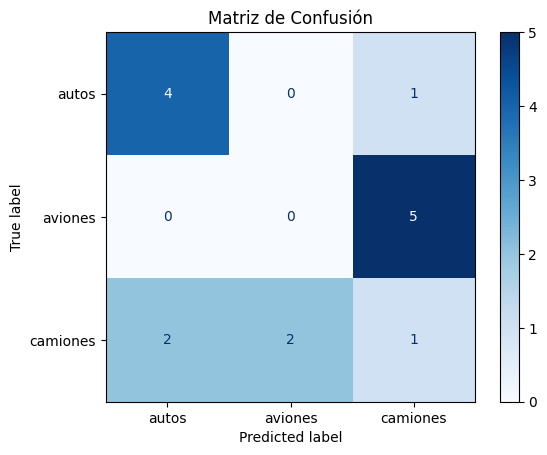

In [ ]:
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


# Obtener los nombres de las clases automáticamente desde las carpetas
class_names = sorted(os.listdir(dataset))  # Ordenar alfabéticamente para consistencia
class_indices = {name: idx for idx, name in enumerate(class_names)}  # Mapear nombres a índices
print(f"Clases detectadas: {class_names}")

# Verdaderas clases (a partir de las etiquetas del dataset)
true_classes = np.array([class_indices[label] for label in labels])  # Mapear etiquetas a índices

# Clases predichas
predicted_classes = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()



In [ ]:
# Guardar el modelo en el formato nativo de Keras
model_path_keras = '/content/drive/My Drive/M5-UDD/Clase 3/modelo_entrenado.keras'
model.save(model_path_keras)
print(f"Modelo guardado en: {model_path_keras}")


Modelo guardado en: /content/drive/My Drive/M5-UDD/Clase 3/modelo_entrenado.keras


In [ ]:
# Cargar el modelo en formato Keras
from tensorflow.keras.models import load_model

loaded_model = load_model(model_path_keras)
print("Modelo cargado exitosamente desde formato .keras.")


Modelo cargado exitosamente desde formato .keras.


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Ruta del dataset "train"
train_dataset_path = '/content/drive/My Drive/M5-UDD/Clase 3/test'

# Dimensiones de las imágenes (deben coincidir con el modelo)
img_height, img_width = 128, 128

# Procesar las imágenes dentro de subcarpetas
x_train_data = []
image_names = []
labels = []  # Opcional: guardar el nombre de la clase para referencia

for class_name in os.listdir(train_dataset_path):
    class_path = os.path.join(train_dataset_path, class_name)
    if os.path.isdir(class_path):  # Solo procesar directorios
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                # Verificar que sea un archivo de imagen
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize((img_width, img_height))
                    x_train_data.append(np.array(img))
                    image_names.append(img_name)
                    labels.append(class_name)  # Opcional: asociar con la clase
            except Exception as e:
                print(f"Error al procesar la imagen {img_name}: {e}")

# Convertir a NumPy array y normalizar
x_train_data = np.array(x_train_data, dtype="float32") / 255.0


In [ ]:
# Ruta del modelo guardado
model_path = '/content/drive/My Drive/M5-UDD/Clase 3/modelo_entrenado.keras'  # Cambiar a .h5 si usaste ese formato

# Cargar el modelo
loaded_model = load_model(model_path)
print("Modelo cargado exitosamente.")


Modelo cargado exitosamente.


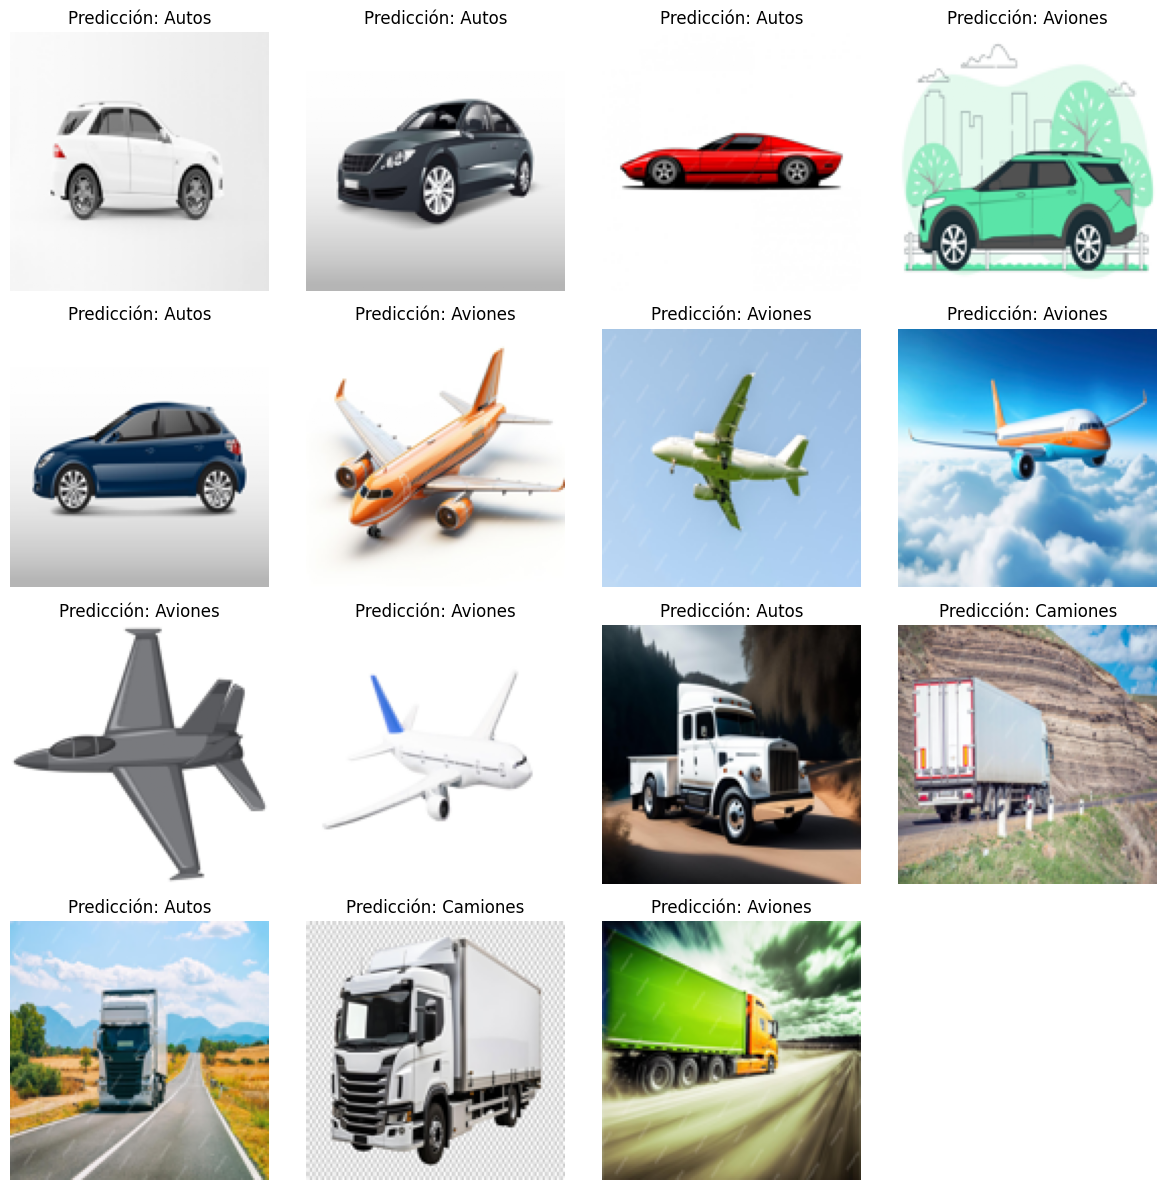

In [ ]:
import matplotlib.pyplot as plt

# Diccionario para mapear índices de clase a nombres de clase
class_labels = {0: 'Autos', 1: 'Camiones', 2: 'Aviones'}  # Ajusta según tus clases reales

# Número de imágenes a mostrar
num_images = len(x_train_data)

# Configurar el grid de imágenes
plt.figure(figsize=(12, 12))  # Ajustar el tamaño del grid

for i in range(min(num_images, 16)):  # Mostrar hasta 16 imágenes (puedes ajustar este número)
    plt.subplot(4, 4, i + 1)  # Configurar una grilla de 4x4
    plt.imshow(x_train_data[i])  # Mostrar la imagen
    plt.title(f"Predicción: {class_labels[predicted_classes[i]]}")  # Mostrar la predicción
    plt.axis('off')  # Quitar ejes

plt.tight_layout()  # Ajustar el layout para evitar superposición
plt.show()

